In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/project_image_1more.zip'

In [ ]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/project_image_1more.zip

In [ ]:
train_dir = 'project_image_binary/train'
test_dir = 'project_image_binary/test'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 40,width_shift_range = 0.2, height_shift_range = 0.2, 
                             shear_range = 0.2, zoom_range = 0.2,horizontal_flip = True,vertical_flip = True,
                             fill_mode = 'nearest')
test_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(train_dir,target_size = (150, 100),
                                                    batch_size = 50,class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_dir,target_size = (150, 100),
                                                    batch_size = 50,class_mode = 'binary')

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (150, 100, 3))

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':       
    set_trainable = True

  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

conv_base.summary()

In [ ]:
from keras import models, layers, optimizers

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))   

model.summary()


model.compile(loss = 'binary_crossentropy', 
              optimizer = optimizers.Adam(lr = 0.000005),
              metrics = ['accuracy'])

In [ ]:
%%time

Hist = model.fit(train_generator, steps_per_epoch = 3, epochs = 200, validation_data = test_generator)

In [ ]:
loss, accuracy = model.evaluate(test_generator)
loss, accuracy

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

test_step = np.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = model.predict_generator(test_generator, steps=test_step)
predicted_class = np.argmax(predictions, axis=1)

true_class = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

conf = confusion_matrix(true_class, predicted_class)

print(conf)


In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])

plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.grid()
plt.show()

# 분류 라벨 확인

In [ ]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/project_image_binary_total.zip

In [ ]:
import pathlib
from glob import glob

data_root = pathlib.Path(glob('/content/project_image_binary_total/*/')[0])
print(data_root)
label = ['0','1']

In [ ]:
!ls /content/project_image_binary_total

In [ ]:
import PIL.Image as Image
import matplotlib.pyplot as plt
import random

all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
print(all_image_paths)
print(all_image_paths[0].split('/')[-2])
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
print('image_count:', image_count)

plt.figure(figsize=(12,12))
for n in range(12):
  image_path = random.choice(all_image_paths)
  plt.subplot(3,3, n+1)
  plt.imshow(plt.imread(image_path))
  idx = int(image_path.split('/')[-2]) +1
  plt.title(str(idx) + ' : ' + label[idx])
  plt.axis('off')
plt.show()

# without Aug

In [2]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/0408_data.zip'

-rw------- 1 root root 19656628 Apr  8 07:08 '/content/drive/My Drive/Colab Notebooks/datasets/0408_data.zip'


In [3]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/0408_data.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/0408_data.zip
   creating: 0408_data/
   creating: 0408_data/data/
   creating: 0408_data/data/test/
   creating: 0408_data/data/test/best/
  inflating: 0408_data/data/test/best/└№╜┼╜║┼╕▒╫╖е176.jpg  
  inflating: 0408_data/data/test/best/└№╜┼╜║┼╕▒╫╖е177.jpg  
  inflating: 0408_data/data/test/best/└№╜┼╜║┼╕▒╫╖е189.jpg  
  inflating: 0408_data/data/test/best/└№╜┼╜║┼╕▒╫╖е212.jpg  
  inflating: 0408_data/data/test/best/└№╜┼╜║┼╕▒╫╖е235.jpg  
  inflating: 0408_data/data/test/best/└№╜┼╜║┼╕▒╫╖е250.jpg  
  inflating: 0408_data/data/test/best/└№╜┼╜║┼╕▒╫╖е253.jpg  
  inflating: 0408_data/data/test/best/├т▒┘╖ш381 ║╣╗ч║╗.jpg  
  inflating: 0408_data/data/test/best/├т▒┘╖ш434 ║╣╗ч║╗.jpg  
  inflating: 0408_data/data/test/best/├т▒┘╖ш440 ║╣╗ч║╗.jpg  
  inflating: 0408_data/data/test/best/╞╨╝╟╜║│└377 ║╣╗ч║╗.jpg  
  inflating: 0408_data/data/test/best/╞╨╝╟╜║│└419 ║╣╗ч║╗.jpg  
  inflating: 0408_data/data/test/best/╞╨╝╟╜║│└433 ║╣╗ч║╗.jpg  
  inflati

In [5]:
train_dir = '0408_data/data/train'
test_dir = '0408_data/data/test'

In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(train_dir,target_size = (640, 640),
                                                    batch_size = 40,class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_dir,target_size = (640, 640),
                                                    batch_size = 40,class_mode = 'binary')

Found 163 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [19]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (640, 640, 3))

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':       
    set_trainable = True

  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

conv_base.summary()

58892288/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 640, 640, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 640, 640, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 640, 640, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 320, 320, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 320, 320, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 320, 320, 128)     147584    
______________________________________________________________

In [20]:
from keras import models, layers, optimizers

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))   

model.summary()


model.compile(loss = 'binary_crossentropy', 
              optimizer = optimizers.Adam(lr = 0.000005),
              metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 20, 20, 512)       14714688  
_________________________________________________________________
flatten (Flatten)            (None, 204800)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               52429056  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 67,144,001
Trainable params: 59,508,737
Non-trainable params: 7,635,264
_________________________________________________________________


In [21]:
%%time

Hist = model.fit(train_generator, steps_per_epoch = 4, epochs = 20, validation_data = test_generator)

Epoch 1/20
4/4 [==============================] - 81s 7s/step - loss: 0.7624 - accuracy: 0.5334 - val_loss: 0.6462 - val_accuracy: 0.6000
Epoch 2/20
4/4 [==============================] - 14s 5s/step - loss: 0.5223 - accuracy: 0.7073 - val_loss: 0.5386 - val_accuracy: 0.7750
Epoch 3/20
4/4 [==============================] - 15s 4s/step - loss: 0.4250 - accuracy: 0.8539 - val_loss: 0.4871 - val_accuracy: 0.8000
Epoch 4/20
4/4 [==============================] - 15s 4s/step - loss: 0.3749 - accuracy: 0.9165 - val_loss: 0.4238 - val_accuracy: 0.9000
Epoch 5/20
4/4 [==============================] - 15s 4s/step - loss: 0.2494 - accuracy: 0.9555 - val_loss: 0.3749 - val_accuracy: 0.9000
Epoch 6/20
4/4 [==============================] - 15s 4s/step - loss: 0.2276 - accuracy: 0.9207 - val_loss: 0.3441 - val_accuracy: 0.9250
Epoch 7/20
4/4 [==============================] - 15s 4s/step - loss: 0.1433 - accuracy: 0.9636 - val_loss: 0.3359 - val_accuracy: 0.8500
Epoch 8/20
4/4 [==================

In [22]:
loss, accuracy = model.evaluate(test_generator)
loss, accuracy

1/1 [==============================] - 4s 4s/step - loss: 0.2107 - accuracy: 0.9000


(0.2107292115688324, 0.8999999761581421)

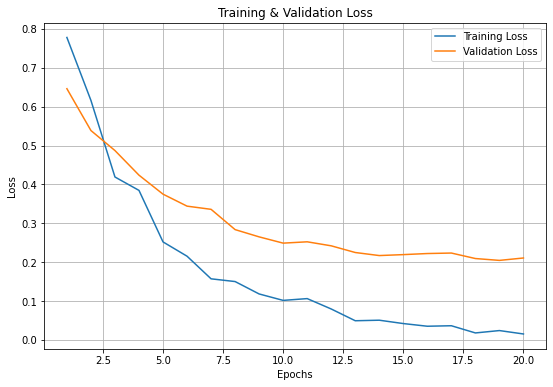

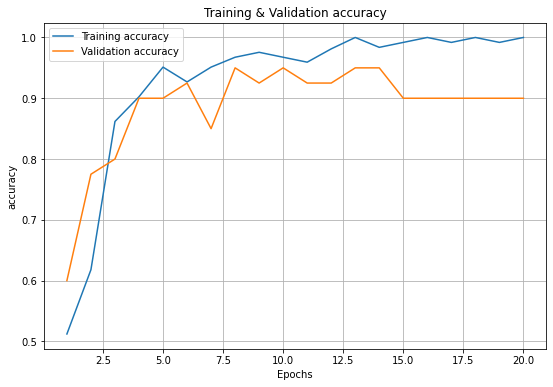

In [23]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])

plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.grid()
plt.show()

FileNotFoundError: ignored

In [ ]:
confusion_matrix(y, y_hat)


In [ ]:
print("-- Evaluate --")
STEP_SIZE_VALID = test_generator.n // test_generator.batch_size
scores = model.evaluate_generator(generator=test_generator, steps=STEP_SIZE_VALID)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))


#Confusion Matrix and Classification Report

np.set_printoptions(precision=2)

test_generator.reset()
Y_pred = model.predict_generator(test_generator, STEP_SIZE_VALID+1)#validation_generator.n // validation_generator.batch_size+1)
classes = test_generator.classes[test_generator.index_array]
y_pred = np.argmax(Y_pred, axis=-1)  # Returns maximum indices in each row
print(sum(y_pred==classes)/10000)

class_names = ['best', 'worst']  # Alphanumeric order

print('-- Confusion Matrix --')
print(confusion_matrix(test_generator.classes[test_generator.index_array], y_pred))

# Plot non-normalized confusion matrix
plot_confusion_matrix(test_generator.classes[test_generator.index_array], y_pred, classes=class_names, title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(test_generator.classes[test_generator.index_array], y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')

plt.show()

print('-- Classification Report --')
print(classification_report(test_generator.classes[test_generator.index_array], y_pred, target_names=class_names))

-- Evaluate --


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


accuracy: 90.00%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


0.002
-- Confusion Matrix --
[[20  0]
 [20  0]]


NameError: ignored

In [25]:
import pathlib
from glob import glob

data_root = pathlib.Path(glob('/content/0408_data/data/*/')[0])
print(data_root)
label = ['test','train']

/content/0408_data/data/test


In [26]:
!ls /content/0408_data

data


In [27]:
import random

all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]

image_count = len(all_image_paths)
print('image_count:', image_count)

image_count: 40


['/content/0408_data/data/test/best/╞╨╝╟╜║│└472 ║╣╗ч║╗.jpg', '/content/0408_data/data/test/best/└№╜┼╜║┼╕▒╫╖е250.jpg', '/content/0408_data/data/test/best/└№╜┼╜║┼╕▒╫╖е253.jpg', '/content/0408_data/data/test/best/└№╜┼╜║┼╕▒╫╖е177.jpg', '/content/0408_data/data/test/best/╞╨╝╟╜║┼╕▒╫╖е409 ║╣╗ч║╗.jpg', '/content/0408_data/data/test/best/├т▒┘╖ш381 ║╣╗ч║╗.jpg', '/content/0408_data/data/test/best/╞╨╝╟╜║┼╕▒╫╖е438 ║╣╗ч║╗.jpg', '/content/0408_data/data/test/best/└№╜┼╜║┼╕▒╫╖е212.jpg', '/content/0408_data/data/test/best/╞╨╝╟╜║│└464 ║╣╗ч║╗.jpg', '/content/0408_data/data/test/best/╞╨╝╟╜║│└377 ║╣╗ч║╗.jpg', '/content/0408_data/data/test/best/├т▒┘╖ш440 ║╣╗ч║╗.jpg', '/content/0408_data/data/test/best/╞╨╝╟╜║│└419 ║╣╗ч║╗.jpg', '/content/0408_data/data/test/best/├т▒┘╖ш434 ║╣╗ч║╗.jpg', '/content/0408_data/data/test/best/╞╨╝╟╜║│└494 ║╣╗ч║╗.jpg', '/content/0408_data/data/test/best/└№╜┼╜║┼╕▒╫╖е189.jpg', '/content/0408_data/data/test/best/└№╜┼╜║┼╕▒╫╖е235.jpg', '/content/0408_data/data/test/best/╞╨╝╟╜║│└461 ║╣╗ч║╗.j

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


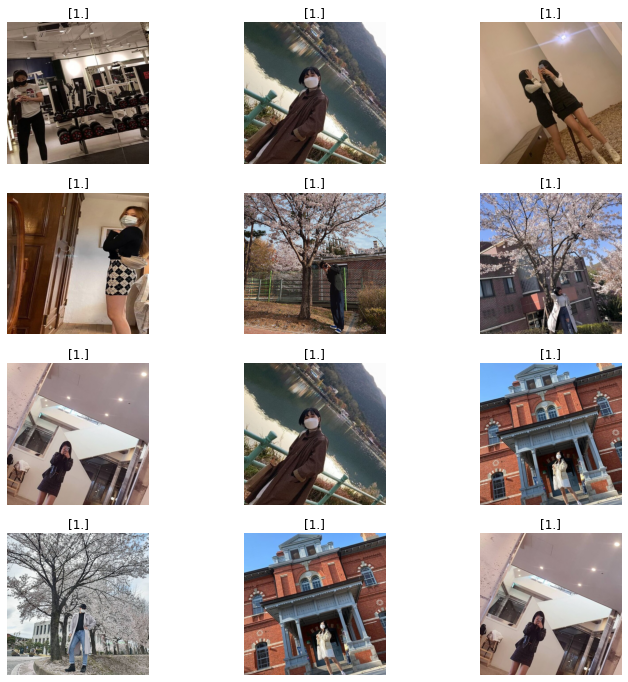

In [29]:
import PIL.Image as Image
import matplotlib.pyplot as plt
import random
import numpy as np
import cv2

all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
print(all_image_paths)
print(all_image_paths[0].split('/')[-2])
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
print('image_count:', image_count)

def softmax(x):
  m = np.max(x)
  sm = np.exp(x-m)/np.sum(np.exp(x-m))
  return sm

plt.figure(figsize=(12,12))
for n in range(12):
  image_path = random.choice(all_image_paths)
  plt.subplot(4,3, n+1)
  plt.imshow(plt.imread(image_path))
  
  img = cv2.imread(image_path)
  img= cv2.resize(img, dsize=(640,640))
  img = img/255.0
  img = np.expand_dims(img, axis=0)

  logits = model.predict(img)[0]
  prediction = softmax(logits)
  # top = prediction.argsort()[::-1]
  # labels = [label[index] for index in top]
  # idx = int(image_path.split('/')[-2])
  plt.title(prediction)
  plt.axis('off')
plt.show()